In [1]:
import networkx as nx
import numpy as np
import torch
from src.mixturemodel import MixtureModel
from src.sbm import generate_sbm, MySbmFromScratch
import torch.multiprocessing as mp
import matplotlib.pyplot as plt
from src.viz import plot_criterions

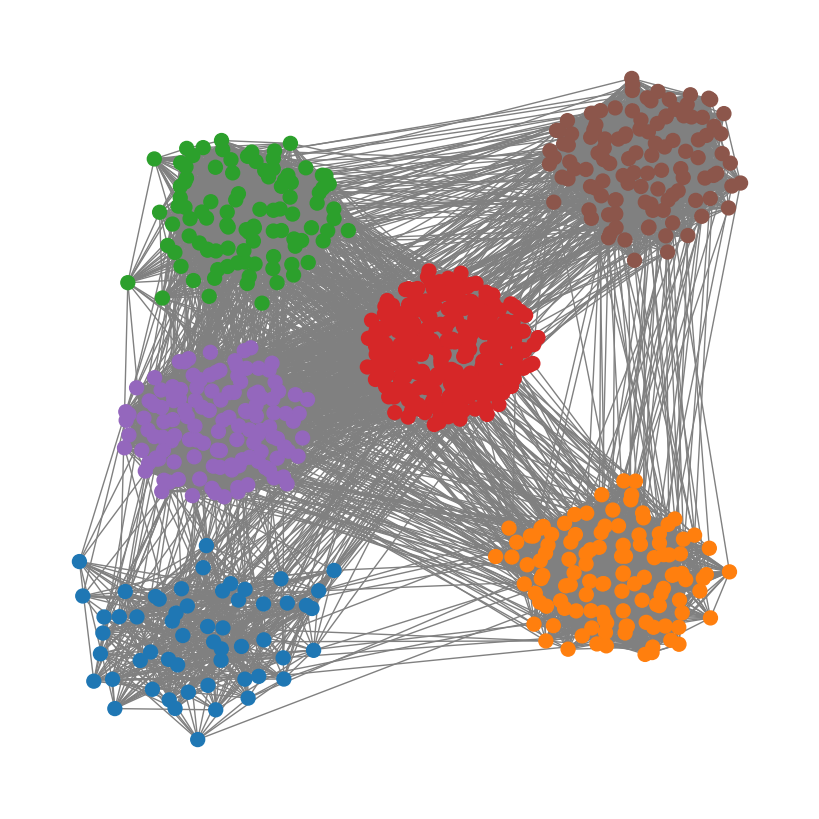

In [2]:
sbm = MySbmFromScratch()

sbm.generate_graph(N=800, K=6, _lambda=0.3, multiplier=0.2, alpha=1.5)
sbm.plot_graph()


In [3]:
model = MixtureModel(sbm.adj, sbm.adj.shape[0], 7, device="cuda")

Le code suivant permet de faire tourner le modèle pour une liste de nombre de clusters, on choisi l'initialisation Kmeans car elle menait généralement a des résultats plus diversifiés

In [ ]:
mp.set_start_method('spawn', force=True)
results = model.full_proc(list_K=[2,3,4,5,6,7,8,9,10], init="Kmeans", max_it=50)

Dans le graph ci dessous, les 3 traits sont confondus: les 3 critères ont choisi le même nombre de classes

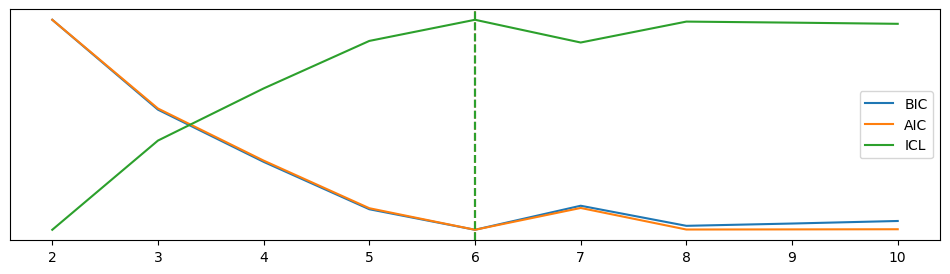

In [5]:
plot_criterions(results)

On réduit maintenant le nombre de données a 200

In [ ]:
sbm = MySbmFromScratch()

sbm.generate_graph(N=200, K=6, _lambda=0.3, multiplier=0.2, alpha=1.5)
model = MixtureModel(sbm.adj, sbm.adj.shape[0], 7, device="cuda")

mp.set_start_method('spawn', force=True)
results_small = model.full_proc(list_K=[2,3,4,5,6,7,8,9,10], init="Kmeans", max_it=50)

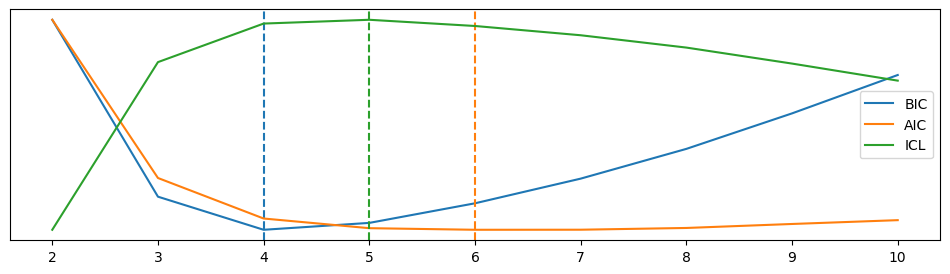

In [7]:
plot_criterions(results_small)

On augmente le nombre de données à 1200

In [ ]:
sbm = MySbmFromScratch()

sbm.generate_graph(N=1200, K=6, _lambda=0.3, multiplier=0.2, alpha=1.5)
model = MixtureModel(sbm.adj, sbm.adj.shape[0], 7, device="cuda")

mp.set_start_method('spawn', force=True)
results_large = model.full_proc(list_K=[2,3,4,5,6,7,8,9,10], init="Kmeans", max_it=50)

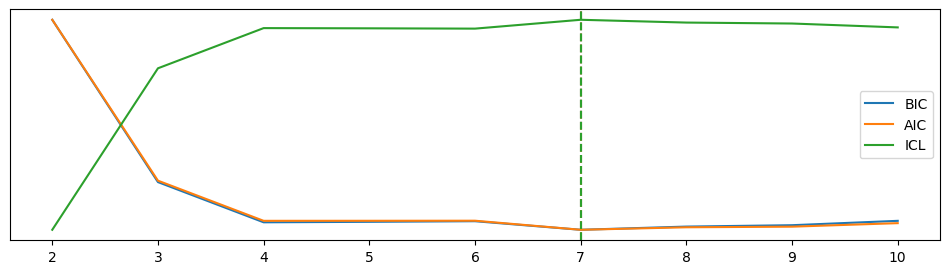

In [ ]:
plot_criterions(results_large)

On test sur un vrai jeux de données (non synthétique)

In [ ]:
graph = nx.read_gml("../data/sp_school_day_2.gml")
adj_matrix = nx.to_numpy_array(graph)

In [ ]:
model = MixtureModel(adj_matrix, adj_matrix.shape[0], 7, device="cuda")
mp.set_start_method('spawn', force=True)
results = model.full_proc(list_K=range(2, 15), init="Kmeans", max_it=40)

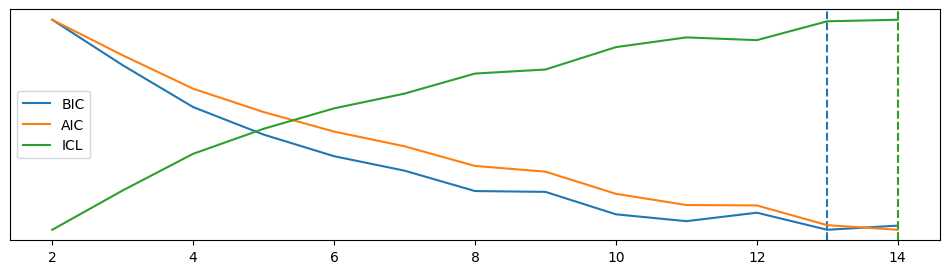

In [ ]:
plot_criterions(results)

/tmp/ipykernel_1819/1327457414.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('tab20', len(classes))


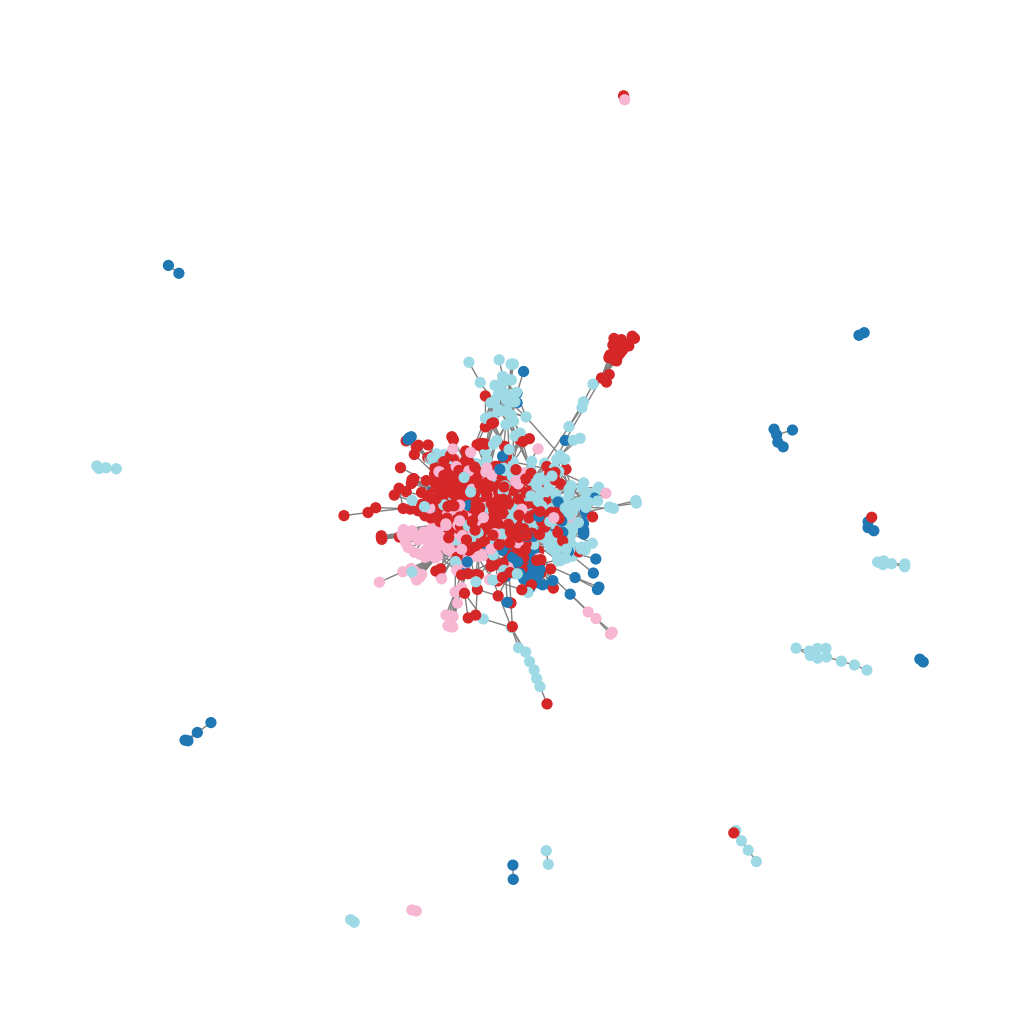

In [ ]:
graph = nx.read_gml("../data/Networking.gml")
graph.remove_edges_from(nx.selfloop_edges(graph)) # On les self connexion

graph.remove_nodes_from(list(nx.isolates(graph))) # idem pour les nodes isolées
adj_matrix = nx.to_numpy_array(graph) 
plot_class_graph(graph, "gt")
# True K = 4

In [ ]:
model = MixtureModel(adj_matrix, adj_matrix.shape[0], 5, device="cuda")

mp.set_start_method('spawn', force=True)
results_emp = model.full_proc(list_K=[2,3,4,5,6,8,9], init="Kmeans", max_it=30)

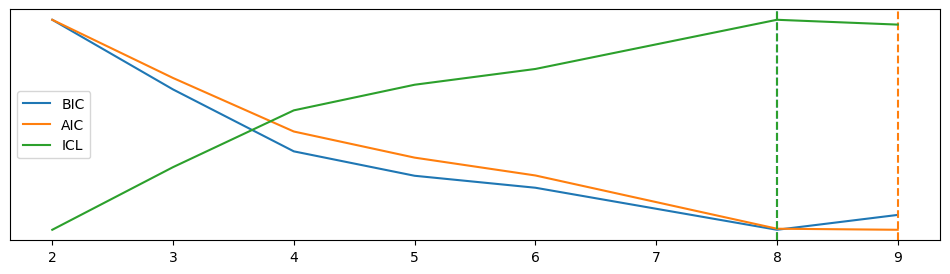

In [38]:
plot_criterions(results_emp)